In [9]:
!pip install pandas numpy matplotlib seaborn nltk

In [10]:
import json
import csv

def json_to_csv(json_file, csv_file):
    # Read JSON file
    with open(json_file, 'r') as f:
        data = json.load(f)

    # Extract field names from the first object in JSON
    fieldnames = list(data[0].keys())

    # Write data to CSV
    with open(csv_file, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for item in data:
            writer.writerow(item)

# Example usage
json_file = 'fashion_products_dataset.json'  # Path to the JSON file
csv_file = 'fashion_products_dataset.csv'    # Path to the CSV file to be created
json_to_csv(json_file, csv_file)


In [11]:
#Data Preprocessing
import pandas as pd

# Load the dataset
def load_dataset(file_path):
    df = pd.read_csv(file_path)
    return df

# Handle missing values
def handle_missing_values(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing Values:\n", missing_values)

    # Handle missing values (e.g., fill with mean, median, or mode)
    # For demonstration, let's fill missing numerical values with mean and categorical values with mode
    df.fillna(df.mean(), inplace=True)  # Fill missing numerical values with mean
    df.fillna(df.mode().iloc[0], inplace=True)  # Fill missing categorical values with mode
    return df

# Clean the data
def clean_data(df):
    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Remove irrelevant columns
    irrelevant_cols = ['pid', 'crawled_at', 'images', 'url']  # Example irrelevant columns
    df.drop(columns=irrelevant_cols, inplace=True)
    return df

# Handle categorical variables (e.g., one-hot encoding)
def handle_categorical_variables(df):
    # One-hot encoding for categorical variables
    df = pd.get_dummies(df, columns=['category', 'brand', 'sub_category'])
    return df

# Example usage:
file_path = 'fashion_products_dataset.csv'  # Path to the dataset file
df = load_dataset(file_path)
df = handle_missing_values(df)
df = clean_data(df)
df = handle_categorical_variables(df)
print(df.head())


Missing Values:
 _id                    0
actual_price         863
average_rating      2446
brand               2068
category               0
crawled_at             0
description        11983
discount             941
images                 0
out_of_stock           0
pid                    0
product_details        0
seller              1741
selling_price          2
sub_category           0
title                  0
url                    0
dtype: int64


<ipython-input-11-d639e7771047>:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)  # Fill missing numerical values with mean


                                    _id actual_price  average_rating  \
0  fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a        2,999             3.9   
1  893e6980-f2a0-531f-b056-34dd63fe912c        1,499             3.9   
2  eb4c8eab-8206-59d0-bcd1-a724d96bf74f        2,999             3.9   
3  3f3f97bb-5faf-57df-a9ff-1af24e2b1045        2,999             3.9   
4  750caa3d-6264-53ca-8ce1-94118a1d8951        2,999             3.9   

                                         description discount  out_of_stock  \
0  Yorker trackpants made from 100% rich combed c...  69% off         False   
1  Yorker trackpants made from 100% rich combed c...  66% off         False   
2  Yorker trackpants made from 100% rich combed c...  68% off         False   
3  Yorker trackpants made from 100% rich combed c...  69% off         False   
4  Yorker trackpants made from 100% rich combed c...  68% off         False   

                                     product_details             seller  \
0  [{'Style Code'

In [12]:
!pip install pandas matplotlib seaborn

Basic Statistics of Numerical Features:
        average_rating
count    27554.000000
mean         3.641972
std          0.664232
min          1.000000
25%          3.300000
50%          3.800000
75%          4.100000
max          5.000000


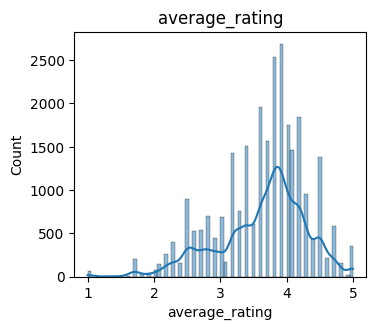

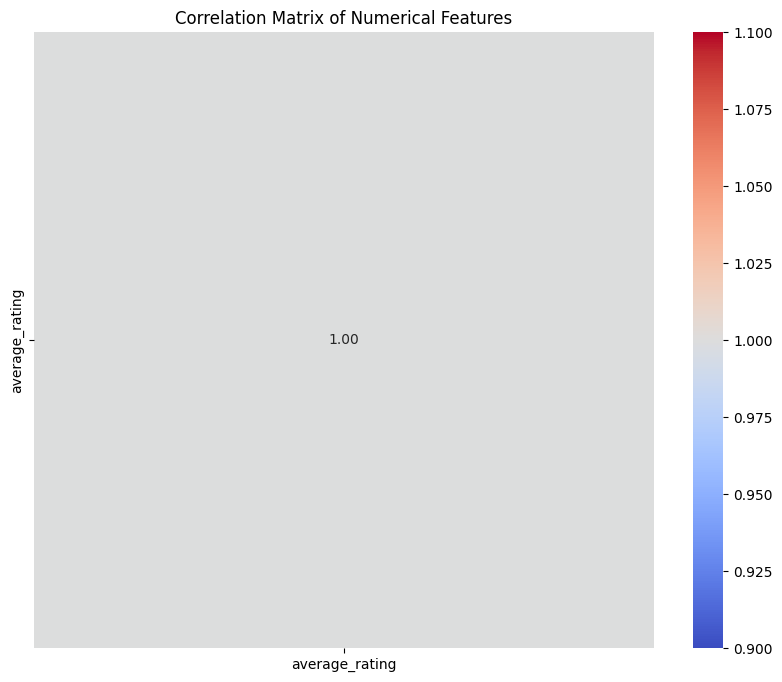

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('fashion_products_dataset.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Explore basic statistics of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])
basic_statistics = numerical_features.describe()
print("Basic Statistics of Numerical Features:\n", basic_statistics)

# Visualize distributions of numerical features
plt.figure(figsize=(10, 6))
for i, column in enumerate(numerical_features.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()
# Investigate correlations between numerical features
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [14]:
!pip install pandas matplotlib seaborn

<ipython-input-15-85bbbe40c1ba>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


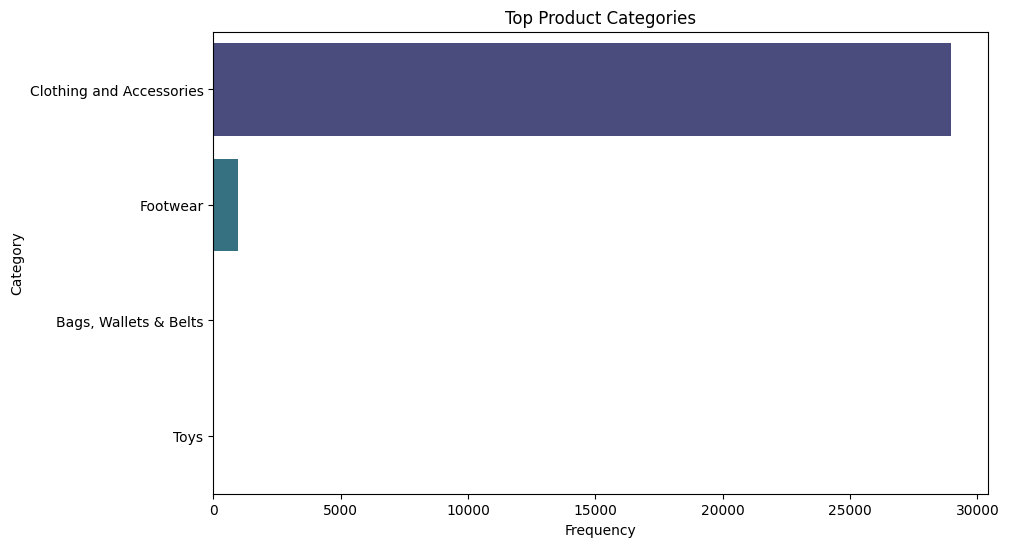

<ipython-input-15-85bbbe40c1ba>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='magma')


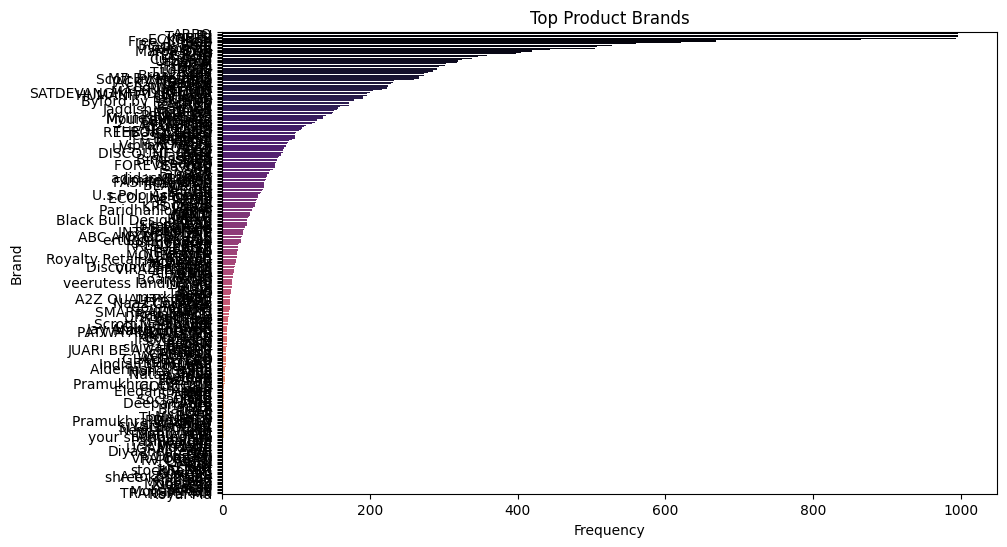

In [15]:
#Identifying Popular Product Categories and Brands:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('fashion_products_dataset.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Analyze frequency counts of categories
category_counts = df['category'].value_counts()

# Visualize top categories using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Top Product Categories')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

# Analyze frequency counts of brands
brand_counts = df['brand'].value_counts()

# Visualize top brands using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='magma')
plt.title('Top Product Brands')
plt.xlabel('Frequency')
plt.ylabel('Brand')
plt.show()

In [16]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv('fashion_products_dataset.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Extract numeric part of discount using regular expressions
df['discount'] = df['discount'].apply(lambda x: re.findall(r'\d+\.*\d*', x)[0] if isinstance(x, str) else x)

# Convert the 'discount' column to float
df['discount'] = df['discount'].astype(float)

# Now analyze the discount percentages and compute the average discount
average_discount = df['discount'].mean()
print("Average Discount Percentage:", average_discount)


Average Discount Percentage: 50.336109294882824


Average Rating: 3.641972127458808


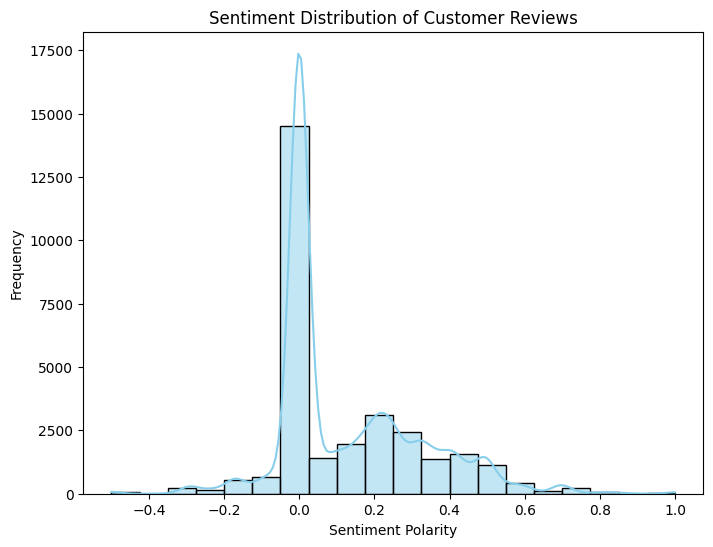

Sample Customer Reviews and Sentiments:
                                         description  sentiment
0  Yorker trackpants made from 100% rich combed c...   0.420833
1  Yorker trackpants made from 100% rich combed c...   0.420833
2  Yorker trackpants made from 100% rich combed c...   0.420833
3  Yorker trackpants made from 100% rich combed c...   0.420833
4  Yorker trackpants made from 100% rich combed c...   0.420833
5  Yorker trackpants made from 100% rich combed c...   0.420833
6  Yorker trackpants made from 100% rich combed c...   0.420833
7  Yorker trackpants made from 100% rich combed c...   0.420833
8  Yorker trackpants made from 100% rich combed c...   0.420833
9  Yorker trackpants made from 100% rich combed c...   0.420833


In [17]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('fashion_products_dataset.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Analyze average ratings
average_rating = df['average_rating'].astype(float).mean()
print("Average Rating:", average_rating)

# Sentiment analysis on customer reviews (if available)
if 'description' in df.columns:
    # Define a function to perform sentiment analysis using TextBlob
    def analyze_sentiment(description):
        analysis = TextBlob(str(description))
        return analysis.sentiment.polarity

    # Apply sentiment analysis to the 'description' column
    df['sentiment'] = df['description'].apply(analyze_sentiment)

    # Visualize sentiment distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(df['sentiment'], bins=20, kde=True, color='skyblue')
    plt.title('Sentiment Distribution of Customer Reviews')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No 'description' column found for sentiment analysis.")

# Explore customer reviews and sentiments (if available)
if 'description' in df.columns:
    # Display sample customer reviews and sentiments
    print("Sample Customer Reviews and Sentiments:")
    print(df[['description', 'sentiment']].head(10))
else:
    print("No 'description' column found for exploring customer reviews.")

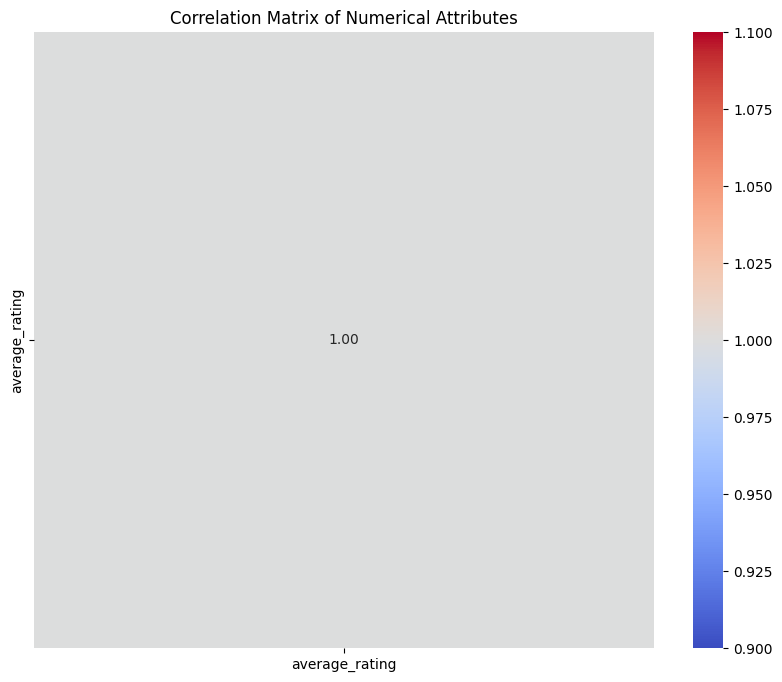

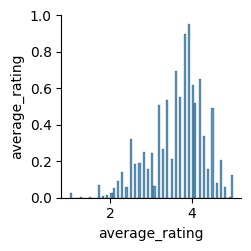

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('fashion_products_dataset.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Select numerical attributes for correlation analysis
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])

# Conduct correlation analysis
correlation_matrix = numerical_attributes.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

# Visualize correlations using pairplot (scatter plots)
sns.pairplot(numerical_attributes)
plt.show()

In [19]:
!pip install pandas nltk gensim scikit-learn

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [24]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
df = pd.read_csv('fashion_products_dataset.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Handle missing values in 'description' column
df['description'].fillna('', inplace=True)

# Preprocessing text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())  # Convert to string and tokenize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

df['processed_description'] = df['description'].apply(preprocess_text)


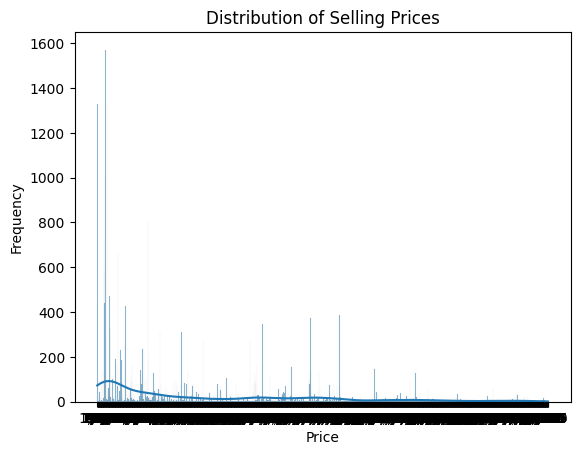

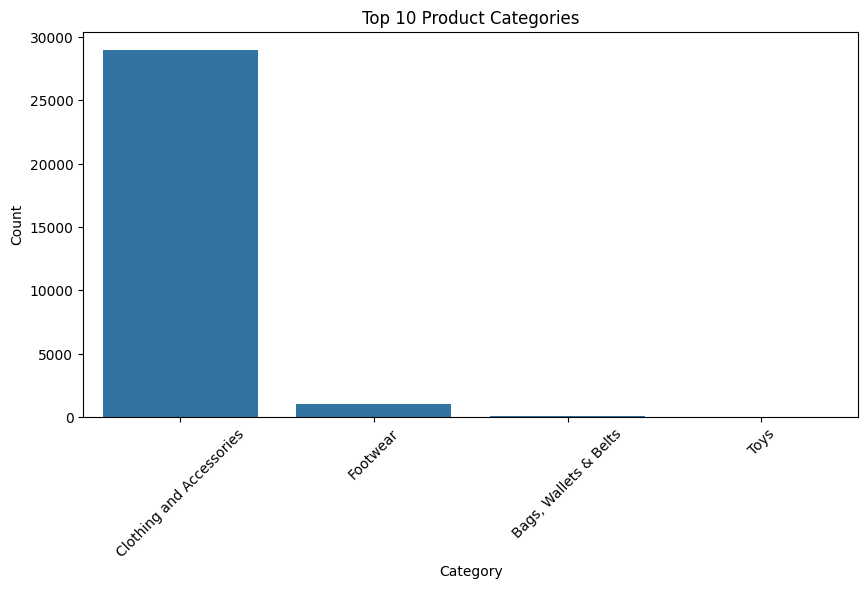

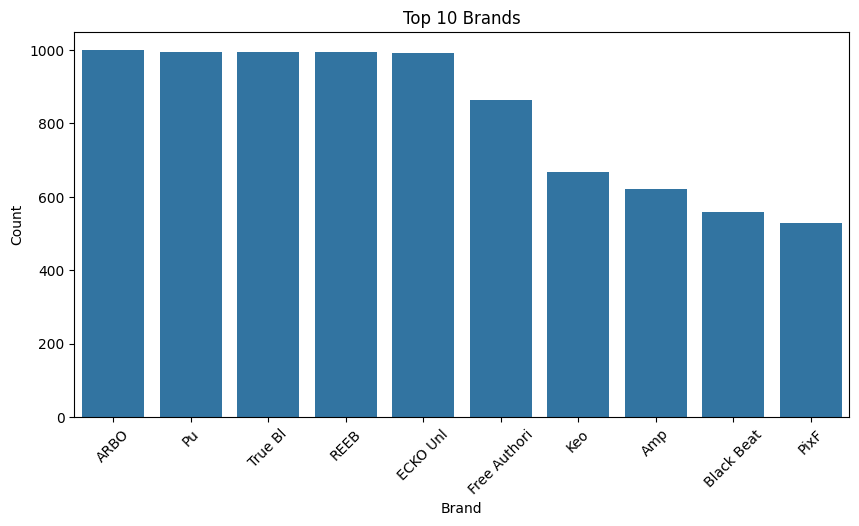

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example of visualizing price distributions
sns.histplot(df['selling_price'], bins=20, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Example of visualizing top categories and brands using bar plots
top_categories = df['category'].value_counts().nlargest(10)
top_brands = df['brand'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [26]:
from scipy.stats import f_oneway

# Remove commas from 'selling_price' column
df['selling_price'] = df['selling_price'].str.replace(',', '').astype(float)

# Example of ANOVA for price variations between categories
category_groups = [group['selling_price'] for name, group in df.groupby('category')]
f_statistic, p_value = f_oneway(*category_groups)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: There are significant differences in prices between categories.")
else:
    print("Fail to reject null hypothesis: There are no significant differences in prices between categories.")


F-statistic: nan
p-value: nan
Fail to reject null hypothesis: There are no significant differences in prices between categories.


In [27]:
import pandas as pd

# Load the dataset
url = 'fashion_products_dataset.csv'
df = pd.read_csv(url)

# Display the first few rows to understand the data
print(df.head())


                                    _id actual_price  average_rating brand  \
0  fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a        2,999             3.9  York   
1  893e6980-f2a0-531f-b056-34dd63fe912c        1,499             3.9  York   
2  eb4c8eab-8206-59d0-bcd1-a724d96bf74f        2,999             3.9  York   
3  3f3f97bb-5faf-57df-a9ff-1af24e2b1045        2,999             3.9  York   
4  750caa3d-6264-53ca-8ce1-94118a1d8951        2,999             3.9  York   

                   category            crawled_at  \
0  Clothing and Accessories  02/10/2021, 20:11:51   
1  Clothing and Accessories  02/10/2021, 20:11:52   
2  Clothing and Accessories  02/10/2021, 20:11:52   
3  Clothing and Accessories  02/10/2021, 20:11:53   
4  Clothing and Accessories  02/10/2021, 20:11:53   

                                         description discount  \
0  Yorker trackpants made from 100% rich combed c...  69% off   
1  Yorker trackpants made from 100% rich combed c...  66% off   
2  Yorker trackpa

In [28]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Check the distribution of categorical variables
print(df['category'].value_counts())

_id                    0
actual_price         863
average_rating      2446
brand               2068
category               0
crawled_at             0
description        11983
discount             941
images                 0
out_of_stock           0
pid                    0
product_details        0
seller              1741
selling_price          2
sub_category           0
title                  0
url                    0
dtype: int64
       average_rating
count    27554.000000
mean         3.641972
std          0.664232
min          1.000000
25%          3.300000
50%          3.800000
75%          4.100000
max          5.000000
Clothing and Accessories    28971
Footwear                      987
Bags, Wallets & Belts          41
Toys                            1
Name: category, dtype: int64


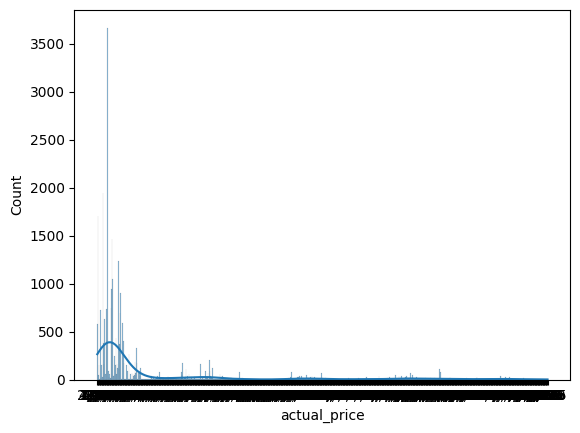

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of product prices
sns.histplot(df['actual_price'], kde=True)
plt.show()